In [8]:
import pandas as pd
df_india=pd.read_csv('df_india.csv')
df_statewise=pd.read_csv('df_statewise.csv')
#df_india_daily=pd.read_csv('df_india_daily.csv')
#df_daily_statewise=pd.read_csv('df_daily_statewise.csv')
#df_india_daily=df_india_daily[df_india_daily['active']>=0]
#import matplotlib.pyplot as plt


In [5]:
date_list=['2020-03-24', '2020-04-14', '2020-05-01', '2020-05-17','2020-05-30',]
df2=df[df['date'].isin(date_list)]

,loc,total,deaths,discharged,date,active,perdeath,perdis,peractive
230,Andhra Pradesh,8,0,0,2020-03-24,8,0.00,0.00,100.00
231,Bihar,3,1,0,2020-03-24,2,33.33,0.00,66.67
232,Chhattisgarh,1,0,0,2020-03-24,1,0.00,0.00,100.00
233,Delhi,30,2,6,2020-03-24,22,6.67,20.00,73.33
234,Gujarat,33,1,0,2020-03-24,32,3.03,0.00,96.97
...,...,...,...,...,...,...,...,...,...
2372,Telengana,2425,71,1381,2020-05-30,973,2.93,56.95,40.12
2373,Tripura,251,0,171,2020-05-30,80,0.00,68.13,31.87
2374,Uttarakhand,716,5,102,2020-05-30,609,0.70,14.25,85.06
2375,Uttar Pradesh,7284,198,4244,2020-05-30,2842,2.72,58.26,39.02


In [12]:
df=df_india
date_list=['2020-03-24', '2020-04-14', '2020-05-01', '2020-05-17','2020-05-30',df[-1:].date.values[0]]
df2=df[df['date'].isin(date_list)]
for i in range(0,4):
    x=date_list[i]
    df2.loc[df2['date']==x,'lockdown']='Lockdown {}'.format(i)
df2.loc[df2['date']=='2020-05-30','lockdown']='Unlock {}'.format(1)
df2.loc[df2['date']==df[-1:].date.values[0],'lockdown']='Present'

In [18]:
#df_statewise['days']=df_statewise['date'].apply(lambda x: (pd.to_datetime(x)-pd.to_datetime('2020-03-10')).days)
df_statewise[df_statewise['loc'].isin(df_statewise[:35]['loc'].values)]

,loc,total,active,deaths,discharged,Latitude,Longitude
0,Delhi,4,4,0,0,28.645944,77.128045
1,Haryana,14,14,0,0,29.195616,76.521237
2,Karnataka,1,1,0,0,14.369817,76.299625
3,Kerala,9,9,0,0,10.326706,76.217706
4,Maharashtra,2,2,0,0,19.392516,75.270554
...,...,...,...,...,...,...,...
2816,Maharashtra,97648,47980,3590,46078,19.392516,75.270554
2823,Punjab,2887,569,59,2259,30.912061,75.452952
2824,Rajasthan,11838,2798,265,8775,26.493282,75.225395
2826,Tamil Nadu,38716,17662,349,20705,11.159711,78.762747


In [33]:
import numpy as np
df_statewise[0:35]['loc'].values

array(['Delhi', 'Haryana', 'Karnataka', 'Kerala', 'Maharashtra', 'Punjab',
       'Rajasthan', 'Tamil Nadu', 'Telengana', 'Jammu and Kashmir',
       'Ladakh', 'Uttar Pradesh', 'Delhi', 'Haryana', 'Karnataka',
       'Kerala', 'Maharashtra', 'Punjab', 'Rajasthan', 'Tamil Nadu',
       'Telengana', 'Jammu and Kashmir', 'Ladakh', 'Uttar Pradesh',
       'Delhi', 'Haryana', 'Karnataka', 'Kerala', 'Maharashtra', 'Punjab',
       'Rajasthan', 'Tamil Nadu', 'Telengana', 'Jammu and Kashmir',
       'Ladakh'], dtype=object)

In [16]:
df_coords_state=pd.read_csv('state wise centroids_2011.csv')
df_statewise=pd.read_csv('df_statewise.csv')
#df_statewise=df_statewise[-35:]
df_statewise[-70:-35]
df_statewise=df_statewise[['loc','total','active','deaths','discharged']]
df_statewise.reset_index(inplace=True, drop=True)
df_statewise=df_statewise[(df_statewise['loc']!='Daman & Diu') & (df_statewise['loc']!='Lakshadweep')]
df_statewise.loc[df_statewise['loc']=='Telangana','loc']='Telengana'
df_statewise.loc[df_statewise['loc']=='Telangana***','loc']='Telengana'
df_statewise.loc[df_statewise['loc']=='Dadra and Nagar Haveli and Daman and Diu','loc']='Dadar Nagar Haveli'
for state in df_statewise['loc'].unique():
   #df_statewise.loc[df_statewise['loc']==state,'Latitude']=df_coords_state[df_coords_state['State']==state]#['Latitude'].values[0]
   df_statewise.loc[df_statewise['loc']==state,'Longitude']=df_coords_state[df_coords_state['State']==state]['Longitude'].values[0]
df=df_statewise

In [17]:
for state in df_statewise['loc'].unique():
    print(state)
    print(df_coords_state[df_coords_state['State']==state]['Longitude'].values)
    

Delhi
[77.12804518]
Haryana
[76.52123743]
Karnataka
[76.29962468]
Kerala
[76.21770621]
Maharashtra
[75.27055447]
Punjab
[75.45295226]
Rajasthan
[75.22539475]
Tamil Nadu
[78.76274652]
Telengana
[78.4867]
Jammu and Kashmir
[75.00063062]
Ladakh
[77.577049]
Uttar Pradesh
[80.65919244]
Andhra Pradesh
[79.91620298]
Uttarakhand
[78.84563219]
Odisha
[84.98396584]
Puducherry
[79.75997363]
West Bengal
[88.14959609]
Chhattisgarh
[82.12509334]
Chandigarh
[76.75872466]
Gujarat
[72.19574739]
Himachal Pradesh
[76.85561814]
Madhya Pradesh
[78.08249213]
Bihar
[85.63677401]
Manipur
[93.8644935]
Mizoram
[92.81661901]
Andaman and Nicobar Islands
[92.88957896]
Goa
[73.86601626]
Assam
[92.65731036]
Jharkhand
[85.85996246]
Arunachal Pradesh
[94.54532681]
Tripura
[91.65871314]
Nagaland
[94.3257526]
Meghalaya
[91.2375107]
Dadar Nagar Haveli
[73.09454961]
Sikkim
[88.51230522]


In [60]:
#import numpy as np
df_statewise['loc'].nunique()

36

In [64]:
df_statewise['loc'].unique()

array(['Delhi', 'Haryana', 'Karnataka', 'Kerala', 'Maharashtra', 'Punjab',
       'Rajasthan', 'Tamil Nadu', 'Telengana', 'Jammu and Kashmir',
       'Ladakh', 'Uttar Pradesh', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura',
       'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli', 'Sikkim',
       'Dadra and Nagar Haveli and Daman and Diu'], dtype=object)

In [62]:
df_statewise[df_statewise['loc']=='Dadra and Nagar Haveli and Daman and Diu']

,loc,total,active,deaths,discharged,Latitude,Longitude
2769,Dadra and Nagar Haveli and Daman and Diu,28,26,0,2,NaN,NaN
2804,Dadra and Nagar Haveli and Daman and Diu,30,28,0,2,NaN,NaN


In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [49]:
np.delete(df_statewise['loc'].unique(),np.where(df_statewise['loc'].unique()=='Andaman and Nicobar Islands'))

array(['Delhi', 'Haryana', 'Karnataka', 'Kerala', 'Maharashtra', 'Punjab',
       'Rajasthan', 'Tamil Nadu', 'Telengana', 'Jammu and Kashmir',
       'Ladakh', 'Uttar Pradesh', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Goa', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Nagaland', 'Meghalaya',
       'Dadar Nagar Haveli', 'Sikkim', 'Daman & Diu'], dtype=object)

In [3]:
import pandas as pd
df_timestamp=pd.read_csv('df_timestamp.csv')
timestamp=pd.to_datetime(df_timestamp.loc[0].values[0])
from datetime import datetime
print(((datetime.today()-timestamp).seconds/3600 + (datetime.today()-timestamp).days*24))


24.148888888888887


In [25]:
df_india_daily.window_size_7

0        0.000000
1        0.000000
3        0.000000
4        0.000000
5        0.000000
         ...     
81    3423.285714
82    3332.428571
83    3434.714286
84    3477.142857
85    3899.714286
Name: window_size_7, Length: 84, dtype: float64

In [2]:
import pandas as pd
df_timestamp=pd.read_csv('df_timestamp.csv')
timestamp=pd.to_datetime(df_timestamp.loc[0].values[0])
from datetime import datetime
from datetime import timedelta
print(((datetime.today()+ timedelta(seconds=19800))-timestamp).seconds/3600 + ((datetime.today()+ timedelta(seconds=19800))-timestamp).days*24)
print(timestamp)


0.9263888888888889
2020-06-11 19:52:07.368968


In [69]:
import pandas as pd
df_timestamp=pd.read_csv('df_timestamp.csv')
timestamp=pd.to_datetime(df_timestamp.loc[0].values[0])
from datetime import datetime
from datetime import timedelta
timestamp

Timestamp('2020-06-12 11:28:00')

In [8]:
def bar_chart_race_plot(df_statewise,df_india):
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import matplotlib.animation as animation
    #plt.rcParams['animation.ffmpeg_path'] = '/ffmpeg'
    df_statewise.reset_index(drop=True,inplace=True)
    colors = dict(zip(
        ['Delhi', 'Haryana', 'Karnataka', 'Kerala', 'Maharashtra','Punjab',
            'Tamil Nadu', 'Rajasthan','Telengana', 'Jammu and Kashmir','Ladakh', 'Uttar Pradesh',
        'Andhra Pradesh', 'Uttarakhand','Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
        'Chandigarh', 'Gujarat','Himachal Pradesh', 'Madhya Pradesh','Bihar', 'Manipur',
        'Mizoram', 'Andaman and Nicobar Islands','Goa', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
        'Tripura','Nagaland', 'Meghalaya', 'Nagaland#', 'Jharkhand#','Madhya Pradesh#', 
        'Dadar Nagar Haveli', 'Sikkim'],
        #lavender,pink,green,red,orange,yellow
        ['#adb0ff', '#f25a92', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
        '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
        '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
        '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
        '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
        '#adb0ff', '#ffb3ff', '#90d595']
    ))
    group_lk = df_statewise['loc'].to_dict()

    fig, ax = plt.subplots(figsize=(15, 8))
    def draw_barchart(date):
        dff = df_statewise[df_statewise['date']==date].sort_values(by='total', ascending=True).tail(10)
        ax.clear()
        ax.barh(dff['loc'], dff['total'], color=[[colors[group_lk[x]] for x in dff.index]][0])
        dx = dff['total'].max() / 200
        #dx=200
        for i, (value, name) in enumerate(zip(dff['total'], dff['loc'])):
            ax.text(value-dx, i, name, size=14, weight=600, ha='right',color='#1a434a')
            ax.text(value+dx, i,f'{value:,.0f}',size=14, ha='left', va='center')
        ax.text(1, 0.4, date, transform=ax.transAxes, color='#a2a2a3', size=46, ha='right', weight=800)
        #
        ax.text(0, 1.06, 'Population', transform=ax.transAxes, size=12, color='#000000')
        
        
        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))#used for inserting ',' 
        ax.xaxis.set_ticks_position('top')
        ax.tick_params(axis='x', colors='#000000', labelsize=14)
        ax.set_yticks([])
        ax.margins(0, 0.01)
        ax.grid(which='major', axis='x', linestyle='-.',color='#777777')
        ax.set_axisbelow(True)#shifts the grids below the graph
        
        ax.text(0, 1.1, 'Progress of Covid-19 in India: ',color='#1a434a',
                transform=ax.transAxes, size=24, weight=600, ha='left')
        ax.text(1, 0, 'by Rutvik Baxi; credit @pratapvardhan', transform=ax.transAxes, ha='right',
                color='#1a434a', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
        ax.text(1, 0.05, 'Since 10th march', transform=ax.transAxes, ha='right',
                color='#1a434a', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
        plt.box(False)
        
    date_list = list(df_india['date'].unique())

    #@st.cache
    #def animate(fig, draw_barchart,date_list):
    fig, ax = plt.subplots(figsize=(15, 9))
    animator = animation.FuncAnimation(fig, draw_barchart, frames=date_list)
        #st.write(animator.to_html5_video(),unsafe_allow_html=True)
    return animator
    #animate(fig, draw_barchart,date_list)


#video_file = open('Covid_india_animation3.mp4', 'rb')
#video_bytes = video_file.read()
#st.video(video_bytes)



Animation.save using <class 'matplotlib.animation.PillowWriter'>


Moviepy - Building video Covid_india_animation3.mp4.
Moviepy - Writing video Covid_india_animation3.mp4



Moviepy - Done !
Moviepy - video ready Covid_india_animation3.mp4


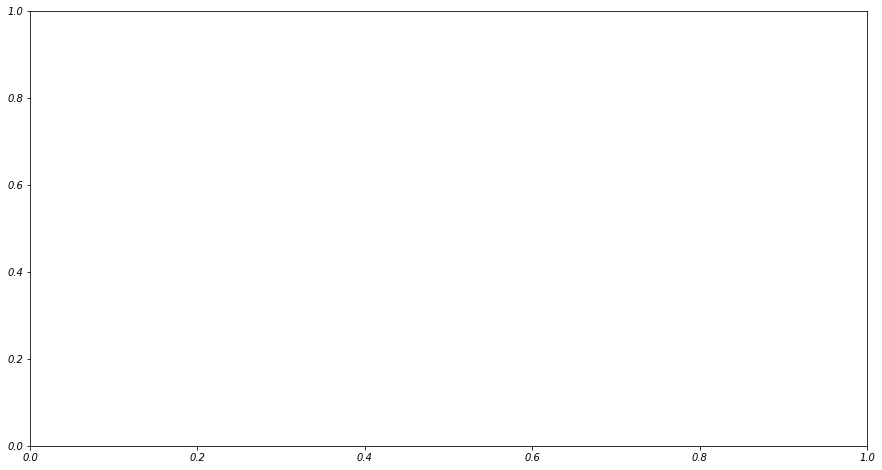

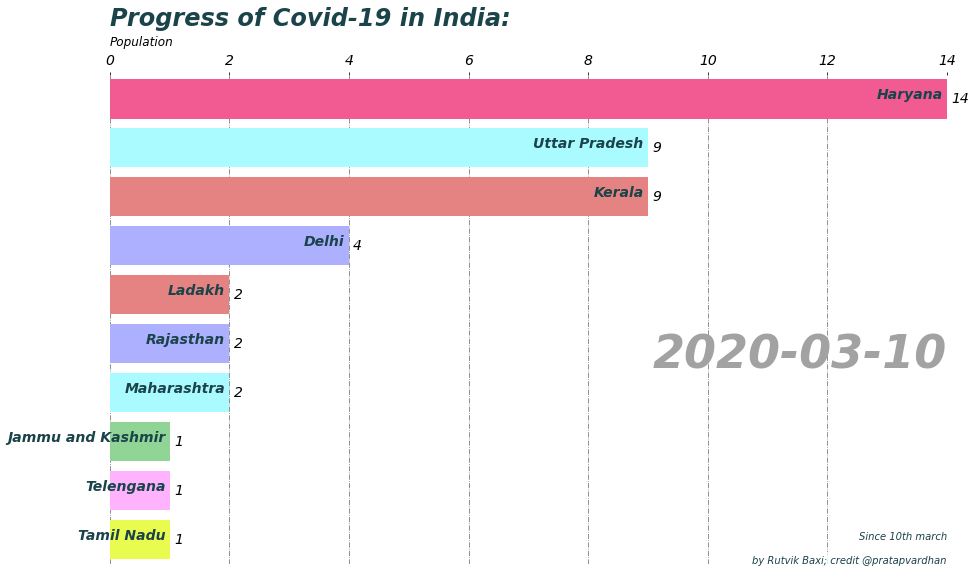

In [9]:
import streamlit as st
import pandas as pd
df_india=pd.read_csv('df_india.csv')
df_statewise=pd.read_csv('df_statewise.csv')
df_statewise.loc[df_statewise['loc']=='Telangana','loc']='Telengana'
df_statewise.loc[df_statewise['loc']=='Dadra and Nagar Haveli and Daman and Diu','loc']='Dadar Nagar Haveli'
from matplotlib import rcParams
animator=bar_chart_race_plot(df_statewise,df_india)
animator.save('Covid_india_animation3.gif',writer='pillow',fps=4)
import moviepy.editor as mp
clip = mp.VideoFileClip("Covid_india_animation3.gif")
clip.write_videofile("Covid_india_animation3.mp4")

In [6]:
import matplotlib


In [7]:
matplotlib.__version__

'3.2.1'

In [1]:
# checking if we can cut the data loading
import json
import urllib
import time
import requests
import numpy as np
import pandas as pd
url = "https://api.rootnet.in/covid19-in/stats/history"
data = json.loads(requests.get(url).text)

In [29]:
data['data'][179]['regional']

[{'loc': 'Andaman and Nicobar Islands',
  'confirmedCasesIndian': 3257,
  'confirmedCasesForeign': 0,
  'discharged': 2863,
  'deaths': 49,
  'totalConfirmed': 3257},
 {'loc': 'Andhra Pradesh',
  'confirmedCasesIndian': 476506,
  'confirmedCasesForeign': 0,
  'discharged': 370163,
  'deaths': 4276,
  'totalConfirmed': 476506},
 {'loc': 'Arunachal Pradesh',
  'confirmedCasesIndian': 4775,
  'confirmedCasesForeign': 0,
  'discharged': 3280,
  'deaths': 7,
  'totalConfirmed': 4775},
 {'loc': 'Assam',
  'confirmedCasesIndian': 121224,
  'confirmedCasesForeign': 0,
  'discharged': 92720,
  'deaths': 345,
  'totalConfirmed': 121224},
 {'loc': 'Bihar',
  'confirmedCasesIndian': 144104,
  'confirmedCasesForeign': 0,
  'discharged': 126371,
  'deaths': 701,
  'totalConfirmed': 144104},
 {'loc': 'Chandigarh',
  'confirmedCasesIndian': 5268,
  'confirmedCasesForeign': 0,
  'discharged': 3105,
  'deaths': 68,
  'totalConfirmed': 5268},
 {'loc': 'Chhattisgarh',
  'confirmedCasesIndian': 40634,
  'c

In [17]:
df_india['date'].count()

180

In [26]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
#print(df)
print('--')
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
df.append(df2, ignore_index=True)
print(df)

--
   A  B
0  1  2
1  3  4
2  5  6
3  7  8
